#  Balance the Dataset 

In [1]:
import pandas as pd
from sklearn.utils import resample

data = pd.read_csv('Twitter_Data.csv')

positive = data[data.category == 1.0]
neutral = data[data.category == 0.0]
negative = data[data.category == -1.0]

min_count = min(len(positive), len(neutral), len(negative))

positive_balanced = resample(positive, replace=False, n_samples=min_count, random_state=42) 
neutral_balanced = resample(neutral, replace=False, n_samples=min_count, random_state=42)
negative_balanced = resample(negative, replace=False, n_samples=min_count, random_state=42) 

balanced_data = pd.concat([positive_balanced, neutral_balanced, negative_balanced])

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data['category'].value_counts())     


category
 0.0    35510
 1.0    35510
-1.0    35510
Name: count, dtype: int64


# pre process the data 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(balanced_data['clean_text'], balanced_data['category'], test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test) 
 

# feature extraction 

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

print("NaNs in X_train:", X_train.isnull().sum())
print("NaNs in X_test:", X_test.isnull().sum())

X_train = X_train.fillna('')
X_test = X_test.fillna('')

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("X_train_tfidf shape:", X_train_tfidf.shape)
print("X_test_tfidf shape:", X_test_tfidf.shape)
 

NaNs in X_train: 3
NaNs in X_test: 0
X_train_tfidf shape: (85224, 5000)
X_test_tfidf shape: (21306, 5000)


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test) 
 


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 

file_path = "C:\\Users\\neel.shah\\Downloads\\Twitter_Data.csv"
data = pd.read_csv(file_path)

cleaned_data = data.dropna()

X = cleaned_data['clean_text']
y = cleaned_data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model_bow = LogisticRegression(max_iter=1000)  
model_tfidf = LogisticRegression(max_iter=1000)

model_bow.fit(X_train_bow, y_train)

model_tfidf.fit(X_train_tfidf, y_train)

y_pred_bow = model_bow.predict(X_test_bow)


y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

accuracy_bow = accuracy_score(y_test, y_pred_bow)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
 
report_bow = classification_report(y_test, y_pred_bow)
report_tfidf = classification_report(y_test, y_pred_tfidf)

accuracy_bow, accuracy_tfidf, report_bow, report_tfidf    
     

(0.944161502116954,
 0.9228385592440327,
 '              precision    recall  f1-score   support\n\n        -1.0       0.91      0.88      0.90      7152\n         0.0       0.95      0.98      0.97     11067\n         1.0       0.95      0.95      0.95     14375\n\n    accuracy                           0.94     32594\n   macro avg       0.94      0.94      0.94     32594\nweighted avg       0.94      0.94      0.94     32594\n',
 '              precision    recall  f1-score   support\n\n        -1.0       0.92      0.81      0.86      7152\n         0.0       0.91      0.98      0.94     11067\n         1.0       0.94      0.94      0.94     14375\n\n    accuracy                           0.92     32594\n   macro avg       0.92      0.91      0.91     32594\nweighted avg       0.92      0.92      0.92     32594\n')

# applying porter stemmer 

In [6]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

stemmer = PorterStemmer() 


data = {
    'clean_text': [
        "I'm running", 
        "He runs",
        "They are running"
    ]
}

balanced_data = pd.DataFrame(data)

def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


balanced_data['clean_text'] = balanced_data['clean_text'].apply(stem_text)

 
print(balanced_data['clean_text'])   


0        i 'm run
1          he run
2    they are run
Name: clean_text, dtype: object


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neel.shah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



# visulaziation 

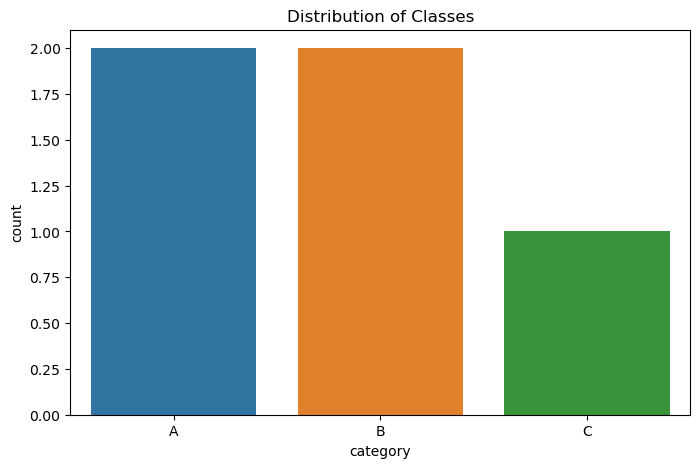

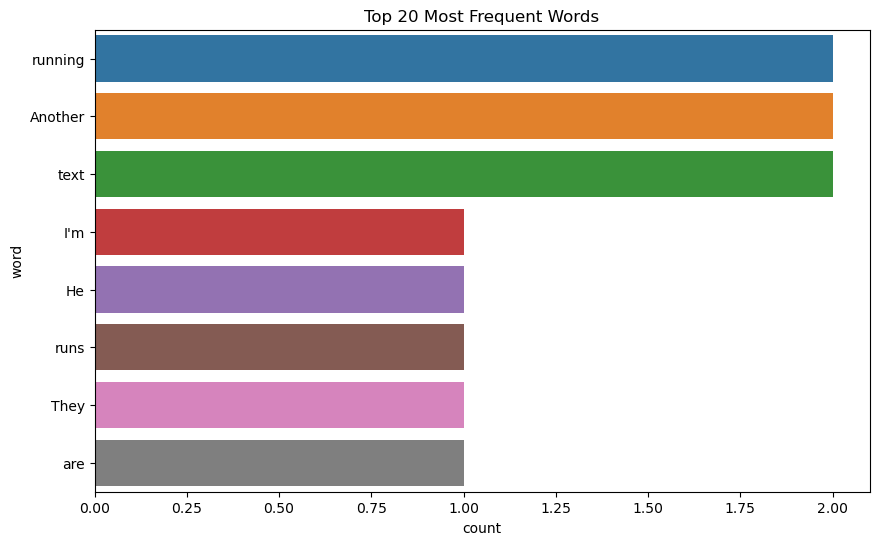

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


data = {
    'category': ['A', 'B', 'A', 'C', 'B'],
    'clean_text': [
        "I'm running", 
        "He runs",
        "They are running",
        "Another text",
        "Another text"
    ]
}


balanced_data = pd.DataFrame(data)


plt.figure(figsize=(8, 5))
sns.countplot(x='category', data=balanced_data)
plt.title('Distribution of Classes')
plt.show()

all_words = ' '.join(balanced_data['clean_text']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])


plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Top 20 Most Frequent Words')
plt.show()   
 

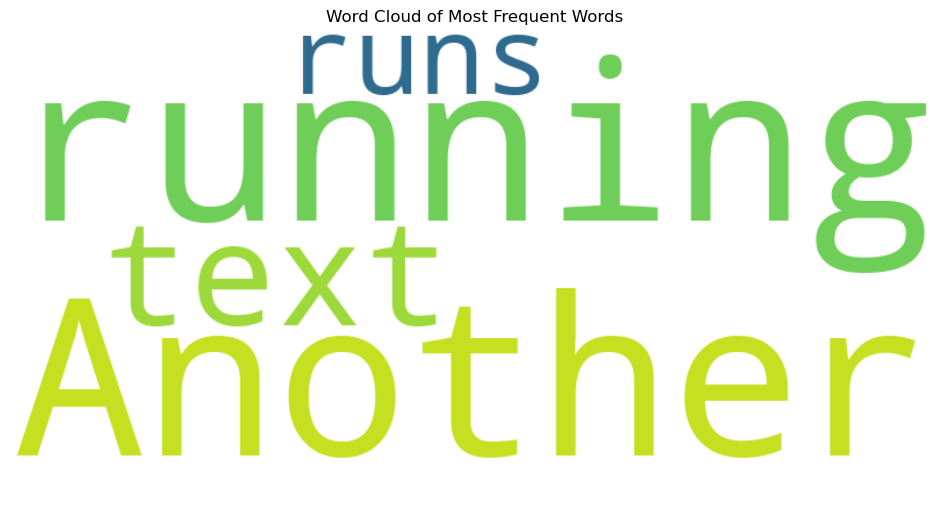

In [8]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Words')
plt.axis('off')
plt.show()


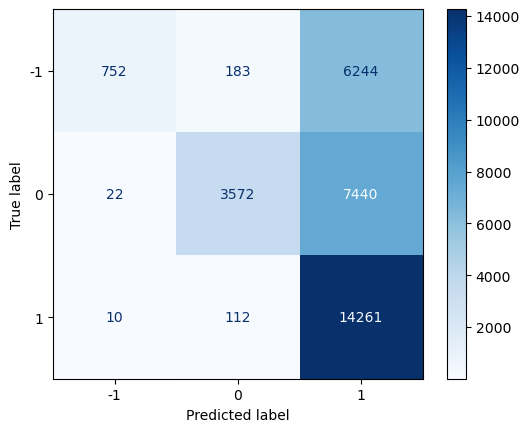

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

file_path = "C:\\Users\\neel.shah\\Downloads\\Twitter_Data.csv"
data = pd.read_csv(file_path)

X = data['clean_text'].astype(str)
y = data['category'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

cm = confusion_matrix(y_test, y_pred, labels=['-1.0', '0.0', '1.0'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-1', '0', '1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [10]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

file_path = "C:\\Users\\neel.shah\\Downloads\\Twitter_Data.csv" 
data = pd.read_csv(file_path)

data['clean_text'] = data['clean_text'].astype(str).fillna('')

sentences = [tweet.split() for tweet in data['clean_text']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


def get_average_word2vec(tweet, model, num_features):
    words = tweet.split()
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model.wv.key_to_index:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec


data['word2vec'] = data['clean_text'].apply(lambda x: get_average_word2vec(x, word2vec_model, 100))


print(data.head()) 


                                          clean_text  category  \
0  when modi promised “minimum government maximum...      -1.0   
1  talk all the nonsense and continue all the dra...       0.0   
2  what did just say vote for modi  welcome bjp t...       1.0   
3  asking his supporters prefix chowkidar their n...       1.0   
4  answer who among these the most powerful world...       1.0   

                                            word2vec  
0  [0.51339823, 0.13794139, 0.42568836, 0.1791065...  
1  [0.13609764, 0.18136849, 0.39003626, 0.3385599...  
2  [0.22412609, -0.03797433, -0.40456298, 0.19800...  
3  [0.13449109, 0.0064272005, -0.06463504, 0.0778...  
4  [-0.10688261, 0.766043, 0.18986547, 0.91351944...  


In [12]:
import pandas as pd
import spacy

file_path = "C:\\Users\\neel.shah\\Downloads\\Twitter_Data.csv"
data = pd.read_csv(file_path)

data['clean_text'] = data['clean_text'].fillna('')

spacy.cli.download("en_core_web_sm")

nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]

data['entities'] = data['clean_text'].apply(extract_entities)

data[['clean_text', 'entities']].head() 


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,clean_text,entities
0,when modi promised “minimum government maximum...,"[(years, DATE)]"
1,talk all the nonsense and continue all the dra...,[]
2,what did just say vote for modi welcome bjp t...,[]
3,asking his supporters prefix chowkidar their n...,[]
4,answer who among these the most powerful world...,"[(today, DATE), (putin, PERSON)]"


In [13]:
from sklearn.decomposition import LatentDirichletAllocation

tfidf = TfidfVectorizer(max_features=5000)

X_tfidf = tfidf.fit_transform(data['clean_text'])

lda = LatentDirichletAllocation(n_components=10, random_state=42)

lda.fit(X_tfidf)

def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

display_topics(lda, tfidf.get_feature_names_out(), 10)


Topic 0:
the modi and money for you will poor that govt
Topic 1:
the modi you and this are not for that have
Topic 2:
the modi and that for you this not will they
Topic 3:
space india satellite modi the down live strike narendra missile
Topic 4:
modi from the rahul gandhi will varanasi narendra and rally
Topic 5:
modi you hai and are the not for this your
Topic 6:
modi the our india and for again proud you great
Topic 7:
the modi credit for was and drdo this nehru not
Topic 8:
modi for vote will you the and only not this
Topic 9:
the modi and india for with via bjp narendra interview
